In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('cuauhtemoc.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2018,17:00,7,352,5.14,11.2,12.6,16,797.1,0.0,633.0
1,26/01/2018,18:00,2,57,5.62,14.7,15.2,12,796.9,0.0,750.0
2,26/01/2018,19:00,330,331,9.16,20.6,17.0,10,796.1,0.0,804.3
3,26/01/2018,20:00,308,322,14.29,29.6,19.0,7,795.2,0.0,776.3
4,26/01/2018,21:00,290,350,14.55,30.9,19.8,6,794.7,0.0,662.3


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,7,352,5.14,11.2,12.6,16,797.1,0.0,633.0,2018-01-26 17:00:00
1,2,57,5.62,14.7,15.2,12,796.9,0.0,750.0,2018-01-26 18:00:00
2,330,331,9.16,20.6,17.0,10,796.1,0.0,804.3,2018-01-26 19:00:00
3,308,322,14.29,29.6,19.0,7,795.2,0.0,776.3,2018-01-26 20:00:00
4,290,350,14.55,30.9,19.8,6,794.7,0.0,662.3,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000
mean,195.837349,212.289157,9.561747,18.735542,10.207831,39.650602,798.278313,0.0,195.996386
std,86.509085,86.482513,5.628722,9.100570,4.879828,16.235714,2.430042,0.0,280.643851
min,1.000000,57.000000,0.390000,3.100000,1.200000,6.000000,793.600000,0.0,0.000000
25%,121.000000,134.000000,5.355000,11.250000,6.500000,28.250000,796.400000,0.0,0.000000
50%,154.500000,176.000000,8.655000,16.850000,9.900000,40.000000,798.200000,0.0,0.000000
75%,279.000000,297.500000,13.442500,26.625000,13.500000,48.000000,800.175000,0.0,440.650000
max,351.000000,359.000000,22.100000,41.200000,21.800000,83.000000,804.400000,0.0,804.300000


In [9]:
# Selecciona los renglones con Temperatura >12ºC y < 13ºC
df_tmp = df[df.TEMP > 12] 
df_select = df_tmp[df_tmp.TEMP < 13]
df_select
#Aqui tuve que cambiar el intervalo de temperatura pues no me mostraba resultados con 24 y 25

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,7,352,5.14,11.2,12.6,16,797.1,0.0,633.0,2018-01-26 17:00:00
49,104,124,14.62,33.1,12.7,31,800.4,0.0,750.0,2018-01-28 18:00:00
55,116,121,15.47,31.3,12.6,38,798.7,0.0,56.0,2018-01-29 00:00:00
74,117,141,19.20,36.8,12.7,44,803.2,0.0,793.2,2018-01-29 19:00:00
98,118,146,17.29,30.8,12.1,45,799.8,0.0,776.5,2018-01-30 19:00:00
99,98,108,16.16,29.0,12.1,46,798.4,0.0,597.8,2018-01-30 20:00:00
131,205,228,9.02,17.7,12.2,41,795.6,0.0,0.0,2018-02-01 04:00:00
154,131,138,11.54,18.7,12.5,39,799.0,0.0,0.0,2018-02-02 03:00:00
155,142,154,9.33,16.5,12.2,40,799.3,0.0,0.0,2018-02-02 04:00:00
156,152,150,6.32,13.3,12.5,40,799.6,0.0,0.0,2018-02-02 05:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      195.837349
DIRR      212.289157
VELS        9.561747
VELR       18.735542
TEMP       10.207831
HR         39.650602
PB        798.278313
PREC        0.000000
RADSOL    195.996386
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()
#En la torre! Hace mucho frio en Cuauhtemoc

10.207831325301207

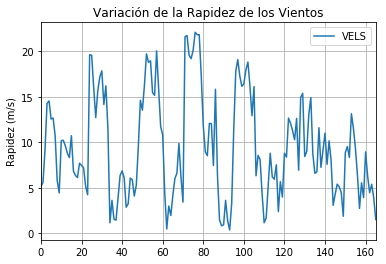

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()
#Necesité cambiar el nombre ya que en mi texto, la rapidez del viento se definió como VELS

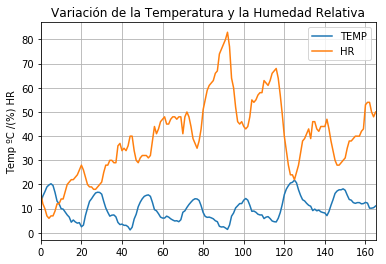

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

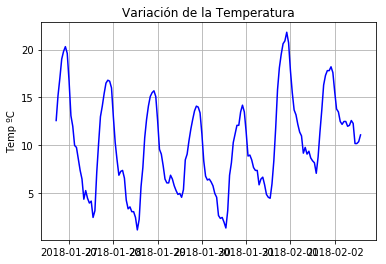

In [14]:
#Gráfica de temperatura según la fecha
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

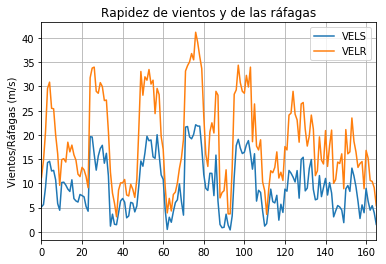

In [15]:
#Gráfica de Rapidez de los vientos y Rapidez de las ráfagas
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Rapidez de vientos y de las ráfagas")
plt.ylabel("Vientos/Ráfagas (m/s)")
plt.grid(True)
plt.show()

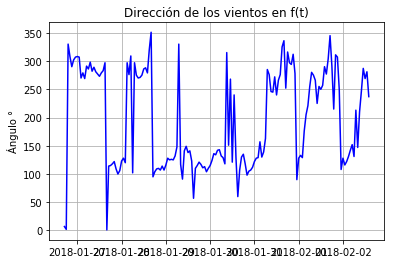

In [16]:
#Gráfica Dirección de los vientos en función del tiempo
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Dirección de los vientos en f(t)")
plt.ylabel("Ángulo °")
plt.grid(True)
plt.show()

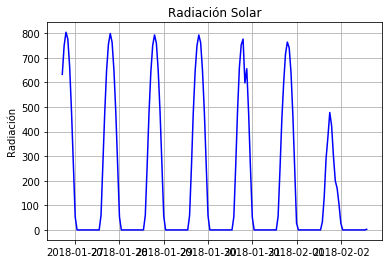

In [17]:
#Gráfica de Radiación solar contra tiempo
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Radiación Solar")
plt.ylabel("Radiación")
plt.grid(True)
plt.show()

In [18]:
#Temperatura mínima
df.TEMP.min()

1.2

In [19]:
#Temperatura máxima
#Es un clima bastante helado, esto es observable en el número que arroja la temperatura máxima. Aunque la temperatura
#mínima no sea bajo cero, se encuentra bastante cerca de él.
df.TEMP.max()

21.800000000000001

In [22]:
#Temperatura y Humedad relativa
plt.plot_date(x=df.TEMP, y=df.HR, fmt="b-")
plt.title("Temperatura y Humedad Relativa")
plt.ylabel("°C")
plt.grid(True)
plt.show()

ValueError: ordinal must be >= 1

In [23]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000
mean,195.837349,212.289157,9.561747,18.735542,10.207831,39.650602,798.278313,0.0,195.996386
std,86.509085,86.482513,5.628722,9.100570,4.879828,16.235714,2.430042,0.0,280.643851
min,1.000000,57.000000,0.390000,3.100000,1.200000,6.000000,793.600000,0.0,0.000000
25%,121.000000,134.000000,5.355000,11.250000,6.500000,28.250000,796.400000,0.0,0.000000
50%,154.500000,176.000000,8.655000,16.850000,9.900000,40.000000,798.200000,0.0,0.000000
75%,279.000000,297.500000,13.442500,26.625000,13.500000,48.000000,800.175000,0.0,440.650000
max,351.000000,359.000000,22.100000,41.200000,21.800000,83.000000,804.400000,0.0,804.300000
